In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('S02-hw-dataset.csv', sep=',') #считываем датасет
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [4]:
data.head() #выводим первые пять строк по умолчанию

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [6]:
data.shape #информация о количестве строк и столбцов

(41, 5)

In [7]:
data.info() # информация о столбцах и типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
data.describe() #описательные статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [3]:
data.isna().mean() # data.isna() - создает датафрейм такого же размера, где true - пропущенное значение, false - значение присутствует. по сути data.isna().mean() вычисляет долю пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [5]:
data.duplicated().sum() # количество полных дубликатов

np.int64(1)

In [6]:
print(data[data.duplicated(keep=False)]) #вывод дубликата

    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


In [7]:
print(data[data['purchases'] < 0]) #значение в purchases меньше 0

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [8]:
print(data[data['revenue'] < 0]) #значение в revenue меньше 0

Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []


In [14]:
print(data[(data['age']<10) | (data['age']>100)]) 

    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488


In [18]:
print(data[((data['purchases']>0) & (data['revenue']==0)) | ((data['purchases']<=0) & (data['revenue']>0))])

    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0


В датасете выявлено несколько проблем качества данных:
1) в столбце возраст пропущено две записи, что составляет около 5 процентов 
2) обнаружен полный дубликат строки user_id = 10
3) выявлены логические противоречия: возраст 5 и 120 лет; отрицательное количество покупок (-1); 
1 случай нулевого дохода и ненулевых покупок; 1 слаучай ненулевого дохода при нулевых покупках

In [19]:
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [20]:
#статистики по странам
#agg() применяет указанные функции к каждому столбцу
data_country = data.groupby('country')
country_stat=data_country.agg({
    'age': ['count', 'mean', 'min', 'max'],
    'purchases': ['mean', 'sum', 'min', 'max'],
    'revenue': ['mean', 'sum', 'min', 'max']
}).round(2)
print(country_stat)

          age                     purchases              revenue              \
        count   mean   min    max      mean sum min max     mean    sum  min   
country                                                                        
CN          2  24.00  20.0   28.0      4.50   9   2   7  1054.00   2108  456   
DE          5  34.60  18.0   52.0      6.50  39   3  11  1445.50   8673  702   
FR         12  46.25  22.0  120.0      4.25  51  -1   7   675.92   8111    0   
RU         13  30.08   5.0   54.0      4.77  62   0   8   790.08  10271    0   
US          7  36.71  23.0   51.0      4.62  37   3   9   557.38   4459    0   

               
          max  
country        
CN       1652  
DE       2475  
FR       1608  
RU       2086  
US        980  


In [23]:
age_bins =[0, 20, 30, 40, 50, 60, 120]
age_labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+']
data['age_group'] = pd.cut(data['age'], bins = age_bins, labels = age_labels, right = False) #pd.cut() распределяет каждого пользователя в соответствующую возрастную группу
age_stats = data.groupby('age_group', observed=False).agg({
    'purchases': ['count', 'mean', 'sum'],
    'revenue': ['mean', 'sum']
})
print(age_stats)

          purchases                    revenue       
              count      mean sum         mean    sum
age_group                                            
<20               2  6.000000  12  1296.000000   2592
20-29            13  4.461538  58   565.538462   7352
30-39            11  6.000000  66  1216.272727  13379
40-49             6  3.000000  18   668.000000   4008
50-59             6  5.000000  30   596.666667   3580
60+               0       NaN   0          NaN      0


Анализ распределения по странам показывает, что Россия и Франция доминируют в датасете. Германия показывает высокие средние доходы на пользователя.
Среднее количество покупок относительно равномерно распределено по возрастным группам, однако наибольший суммарный доход показывает возрастная группа
30-39 лет.

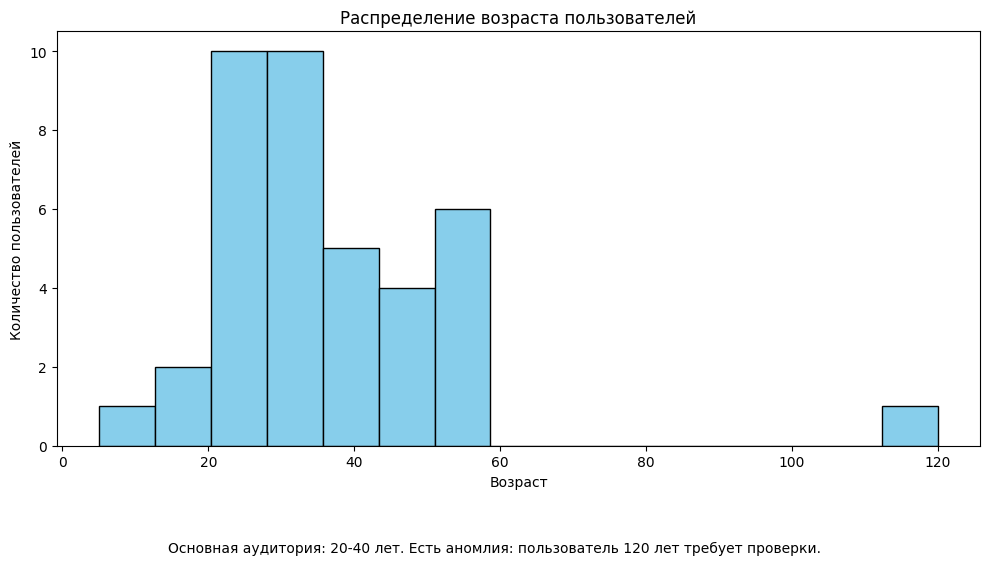

In [15]:
# гистограмма
#распределение пользователей по возрасту 
fig, ax = plt.subplots(figsize=(10, 6)) # создаем полотно заданного размера
ax.hist(data['age'].dropna(), bins = 15, color = 'skyblue', edgecolor='black')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество пользователей')
ax.set_title('Распределение возраста пользователей')
plt.figtext(x=0.5, y=0.02, s="Основная аудитория: 20-40 лет. Есть аномлия: пользователь 120 лет требует проверки.", ha='center')
#х,у-расположение по горизонтали и вертикали, s - текст, ha - выравнивание текста по центру
plt.tight_layout(rect=[0, 0.1, 1, 0.95]) #left/bottom/right/top-левая граница/нижняя/правая/верхняя
plt.savefig('../HW02/figures/histogram.png', dpi=300, bbox_inches='tight')
plt.show()

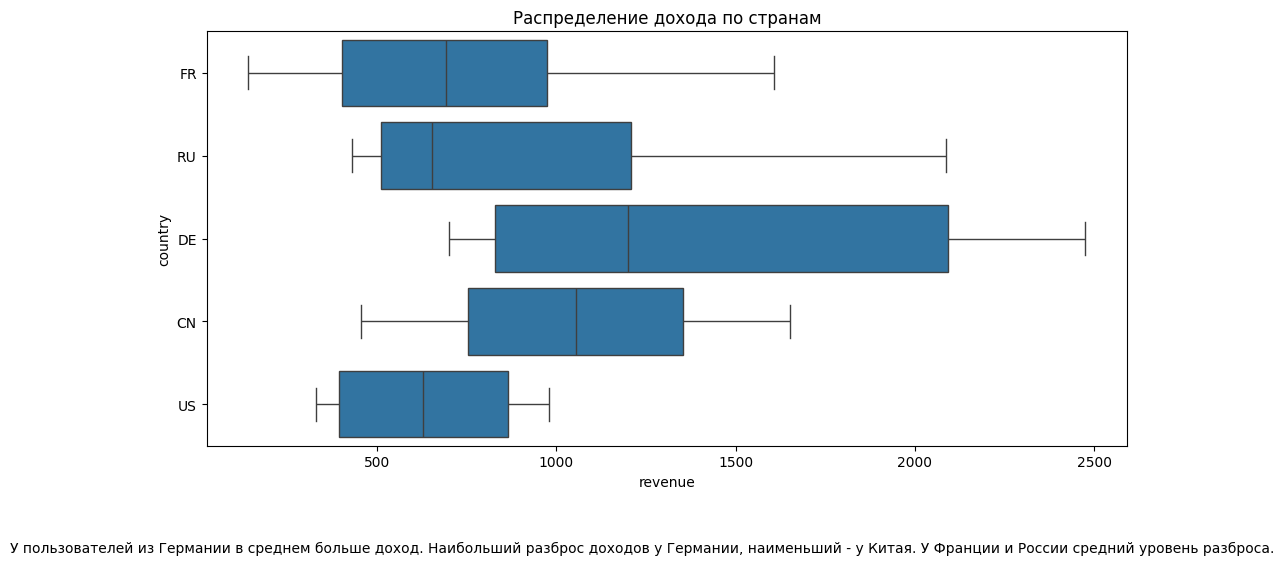

In [17]:
# boxplot
plt.figure(figsize=(10,6))
filt_data = data[data['revenue']>0]
sns.boxplot(y='country', x='revenue', data=filt_data, orient='h')
plt.title('Распределение дохода по странам')
plt.figtext(x=0.5, y=0.02, s="У пользователей из Германии в среднем больше доход. Наибольший разброс доходов у Германии, наименьший - у Китая. У Франции и России средний уровень разброса.", ha='center')
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('../HW02/figures/boxplot.png', dpi=300, bbox_inches='tight')

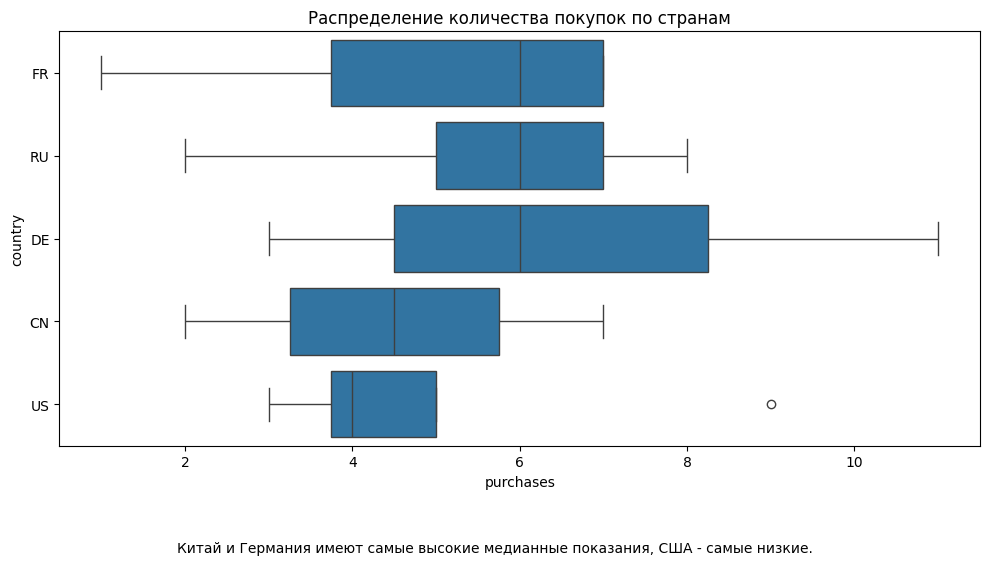

In [18]:
plt.figure(figsize=(10,6))
filt_data_2=data[data['purchases']>0]
sns.boxplot(y='country', x='purchases', data=filt_data_2, orient ='h')
plt.title('Распределение количества покупок по странам')
plt.figtext(x=0.5, y=0.02, s="Китай и Германия имеют самые высокие медианные показания, США - самые низкие.", ha='center')
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('../HW02/figures/boxplot2.png', dpi=300, bbox_inches='tight')

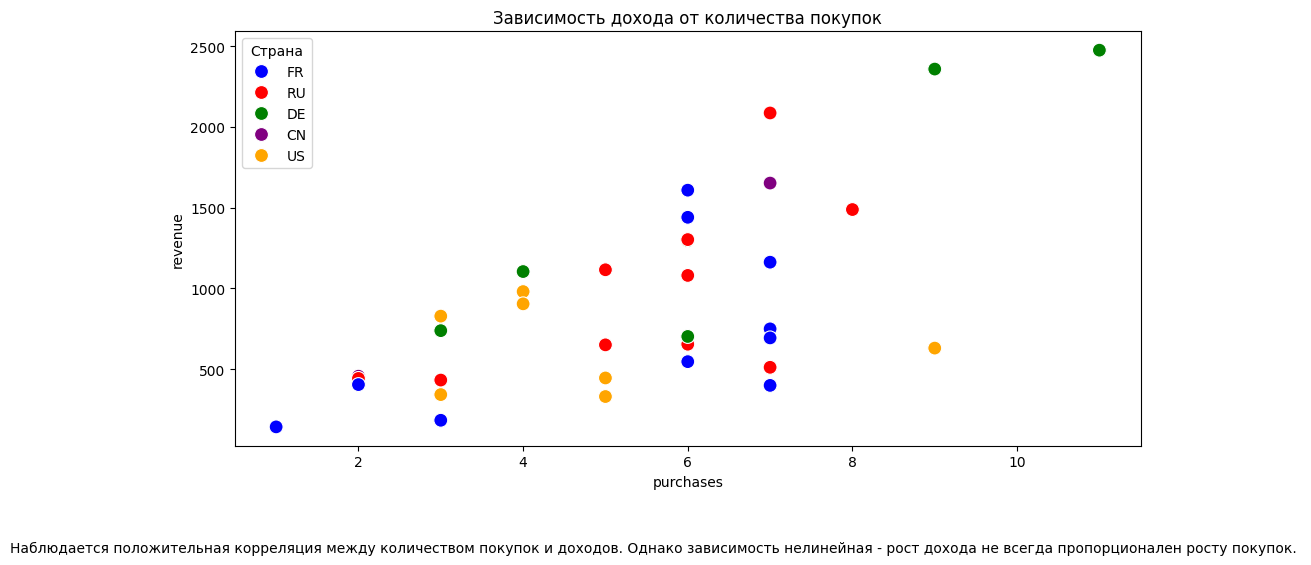

In [20]:
# scatterplot
fig = plt.subplots(figsize=(10, 6))
filt_data_3=data[(data['purchases']>0) & (data['revenue']>0)]
sns.scatterplot(x='purchases', y='revenue', data=filt_data_3, hue = 'country', palette={'FR':'blue', 'RU':'red', 'DE': 'green', 'US': 'orange', 'CN': 'purple'}, s=100)
plt.title('Зависимость дохода от количества покупок')
plt.legend(title='Страна')
plt.figtext(x=0.5, y=0.02, s="Наблюдается положительная корреляция между количеством покупок и доходов. Однако зависимость нелинейная - рост дохода не всегда пропорционален росту покупок. ", ha='center')
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('../HW02/figures/scatterplot.png', dpi=300, bbox_inches='tight')

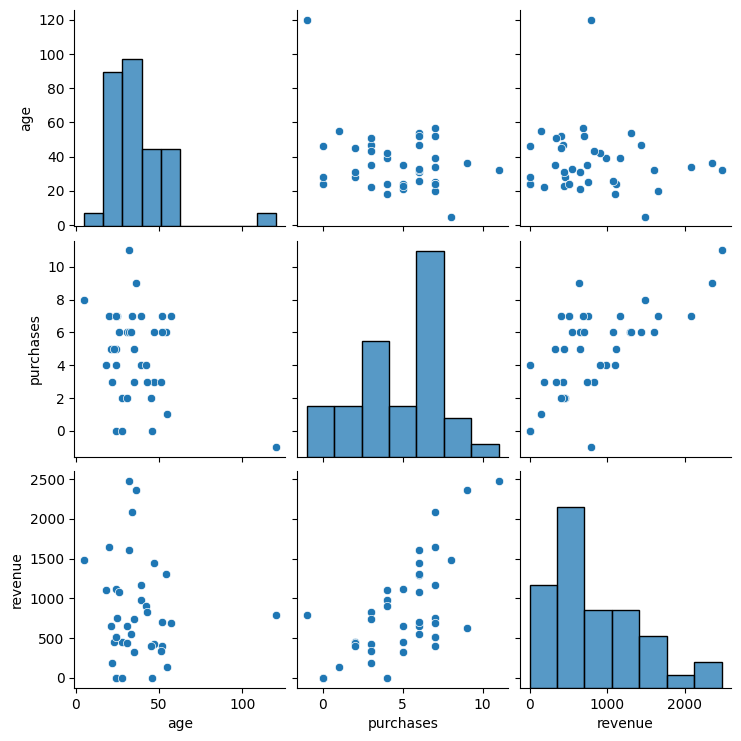

In [20]:
#%%capture
cols = ['age', 'purchases',	'revenue']
sns_plot=sns.pairplot(data[cols])
plt.savefig('../HW02/figures/pairplot.png', dpi=300, bbox_inches='tight')